In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [6]:
df = pd.read_csv('badminton_dataset.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No


In [7]:
df.tail()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
31,Overcast,Mild,Normal,Weak,Yes
32,Sunny,Cool,Normal,Strong,No
33,Rain,Hot,Normal,Weak,No
34,Sunny,Mild,Normal,Weak,Yes
35,Overcast,Mild,Normal,Strong,No


In [8]:
df = df.apply(preprocessing.LabelEncoder().fit_transform)
df.head()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,0,0,0,1,1
1,2,2,1,0,0
2,1,2,1,0,0
3,2,0,0,1,1
4,2,0,0,0,0


In [9]:
df.tail()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
31,0,2,1,1,1
32,2,0,1,0,0
33,1,1,1,1,0
34,2,2,1,1,1
35,0,2,1,0,0


In [10]:
#a. Split the data set into training and test sets.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [11]:
#b. Build the decision tree
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred = dt.predict(X_test)

In [13]:
#c. Check model performances on training and test data sets.
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  1.0


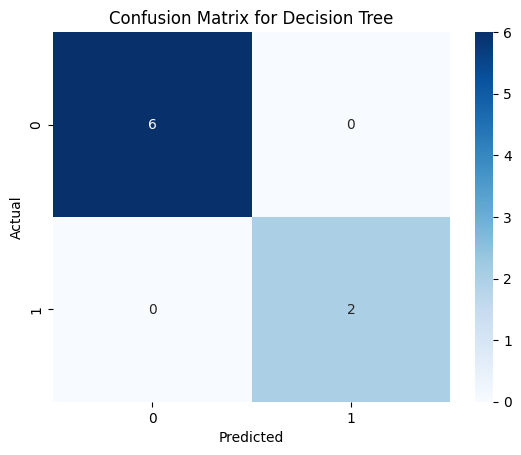

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



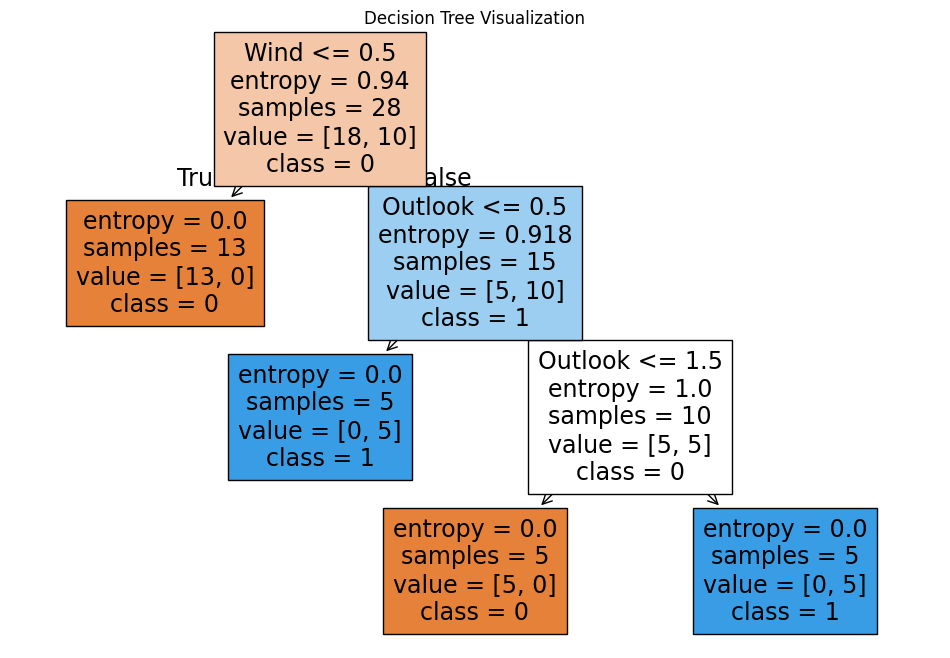

In [16]:
# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=[str(i) for i in np.unique(y)])
plt.title('Decision Tree Visualization')
plt.show()

In [17]:
#d. Apply cost complexity pruning to overcome overfitting problem
dt_pruned = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.01)
dt_pruned.fit(X_train, y_train)
print('Pruned Decision Tree Accuracy:', accuracy_score(y_test, dt_pruned.predict(X_test)))

Pruned Decision Tree Accuracy: 1.0


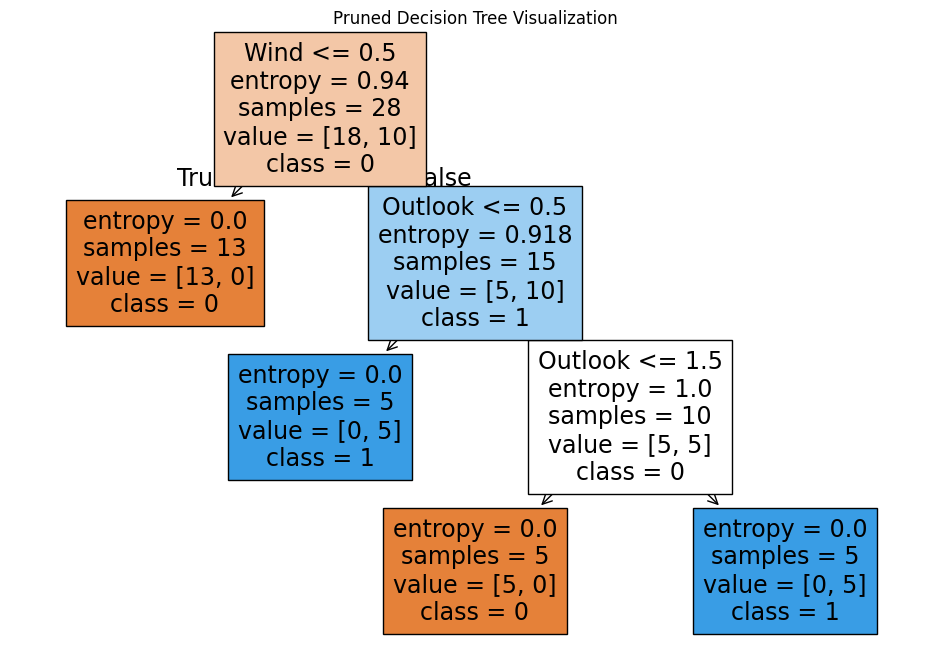

In [18]:
# Pruned Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_pruned, filled=True, feature_names=df.columns[:-1], class_names=[str(i) for i in np.unique(y)])
plt.title('Pruned Decision Tree Visualization')
plt.show()

In [19]:
#e. Apply Random Forest algorithm to overcome overfitting problem.
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=100)
rf.fit(X_train, y_train)
print('Random Forest Accuracy:', accuracy_score(y_test, rf.predict(X_test)))

Random Forest Accuracy: 1.0


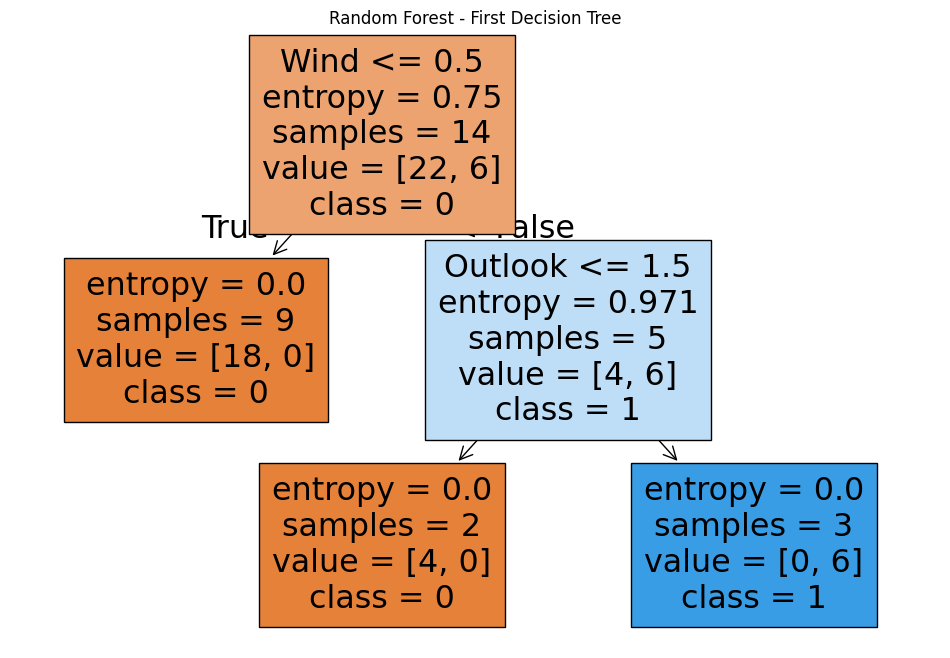

In [20]:
# Plot one tree from the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], filled=True, feature_names=df.columns[:-1], class_names=[str(i) for i in np.unique(y)])
plt.title('Random Forest - First Decision Tree')
plt.show()

In [21]:
#f. Apply Ada-boost ensemble method on Decision stumps.
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, criterion='entropy'), n_estimators=50, random_state=100)
ab.fit(X_train, y_train)
print('AdaBoost Accuracy:', accuracy_score(y_test, ab.predict(X_test)))

AdaBoost Accuracy: 1.0


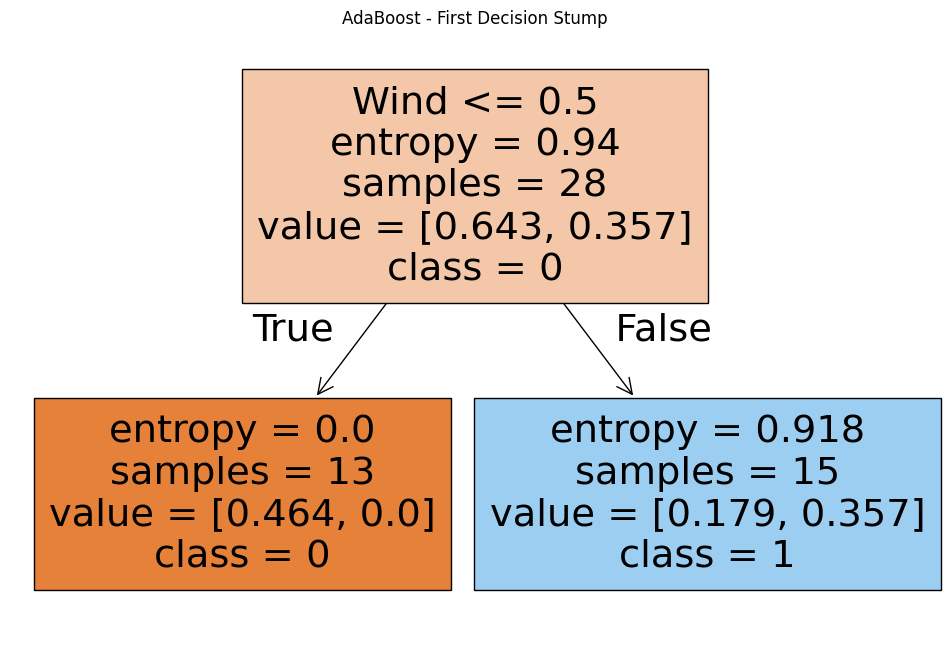

In [22]:
# Plot one tree from AdaBoost (Decision Stump)
plt.figure(figsize=(12, 8))
plot_tree(ab.estimators_[0], filled=True, feature_names=df.columns[:-1], class_names=[str(i) for i in np.unique(y)])
plt.title('AdaBoost - First Decision Stump')
plt.show()

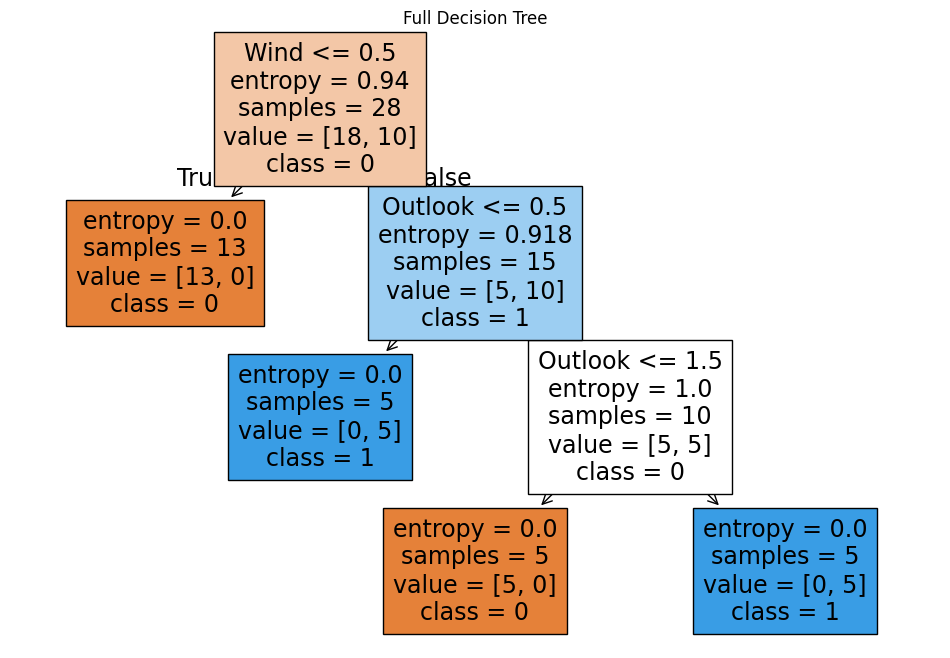

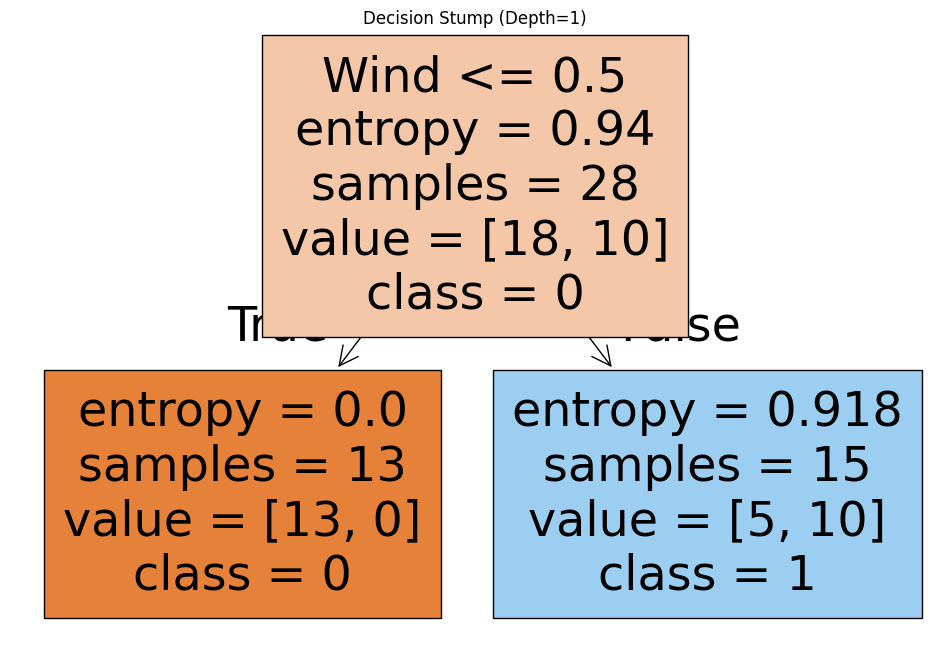

In [23]:
# Compare Full Decision Tree vs Decision Stump
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=[str(i) for i in np.unique(y)])
plt.title('Full Decision Tree')
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(DecisionTreeClassifier(max_depth=1,criterion='entropy').fit(X_train, y_train), filled=True, feature_names=df.columns[:-1], class_names=[str(i) for i in np.unique(y)])
plt.title('Decision Stump (Depth=1)')
plt.show()